## 七月在线机器学习集训营五期第三周(数据可视化)考试
#### 考试说明:
- 起止时间：请同学在2018年11月9日至11月11日期间完成，最晚提交时间本周日（11月11日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试提交方式：请同学<font color=red><b>拷贝</b></font>该试卷后，将文件更名为同学姓名拼音-exam3（例如wangwei-exam3）后，移动至/0.Teacher/Exam/3/目录下进行作答。
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分处不用填写

- 同学姓名: 牛文哲
- 批改人：   
- 最终得分:

<center><h1>####答卷开始####</h1></center>
<hr>

## 问答题(共5题，每题8分，共计40分)

### 1.随机从某超市抽取10个顾客，得到他们购物所花费的金额（单位：元）

- 数据：388，24，152，63.2，224.6，26，69，70，138，213

- 请问我们可以用哪些统计量，分析该组数据？

回答：
- 可以获得顾客消费的最大值、最小值、平均值、中位数、方差等信息。
- 如果有顾客的年龄、性别等信息的话，还可以分组对上述信息进行分析。

### 2.（接上题）试从可视化的角度分别解读这些统计量对分布的影响？

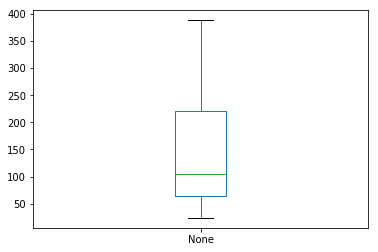

In [1]:
%matplotlib inline
import pandas as pd
cost = pd.Series([388,24,252,63.2,224.6,26,69,70,138,213])
cost.plot(kind = 'box')

### 3.下表是2006年北京上海和天津，按收入法计算的地区生产总值（按当年价格计算）数据。

|地  区|劳动者报酬|生产税净额|固定资产折旧|营业盈余|
|:---|:---|:---|:---|:---|
|北京|3496.57|1161.55|1251.09|1961.07|
|天津|1383.36	|775.09|595.09|1605.61|			
|上海|3756.56|1623.36|1730.51|3255.94|	

- 请给出至少三种<b>适用</b>于描述上述数据所用的可视化图形？并简要说明这些方法的特点和用途。
 				



/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


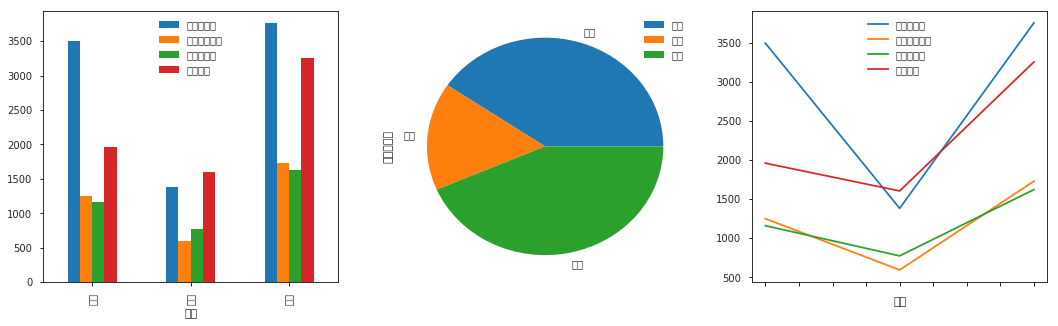

In [101]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['font.family'] = ['PingFang.ttc'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
from matplotlib import font_manager
#读入数据
data = pd.DataFrame({ 
    '地区':["北京","天津","上海"],
    '劳动者报酬': [3496.57,1383.36,3756.56],
    '生产税净额': [1161.55,775.09,1623.36],
    '固定资产折旧': [1251.09,595.09,1730.51],
    "营业盈余":[1961.07,1605.61,3255.94]})

data = data.set_index('地区')

my_font = font_manager.FontProperties(fname = "/System/Library/Fonts/PingFang.ttc")

plt.rcParams["figure.figsize"] = (18,5)
fig,ax = plt.subplots(1,3)

# 柱状图，对比各个城市之间不同类型数据的差异。
data.plot.bar(ax= ax[0])

# 饼图，可以直观的展示出各个城市某个分量的百分比，缺点是一个图只能表示一个特征
data[['劳动者报酬']].plot(kind='pie', subplots= True, ax = ax[1])

# 折现图， 比较容易反应出，X轴变量对y轴的影响，观察其变化趋势。
data.plot(ax= ax[2])
plt.show()

### 4.试述有哪些方法可以判断一组数据是否服从正态分布？

1. 可以画出数据的的直方图或者核概率密度图，进行大概估计，不过这种方法不严谨，仅适用于大概估算。
2. 通过计算偏度和峰度来检验。偏度和峰度均为0时，该组数据服从正态分布；

### 5.试述您对置信水平和置信区间的理解？

- 置信水平是指总体参数值落在样本统计值某一区内的概率；而置信区间是指在某一置信水平下，样本统计值与总体参数值间误差范围。置信区间越大，置信水平越高。

## 实战题(共四大题，20小题，每小题3分，共60分)
#### 注意:每小题绘图均要求使用seaborn库进行,绘图下方均要求给出同学的分析或见解，只有图没有分析不给分

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 1.航班乘客变化分析 (10分)

- 载入相应绘图库及航班乘客数据（flights）

In [51]:
flights_df=sns.load_dataset("../data/flights")
flights_df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


- 分析年度乘客总量变化情况（折线图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


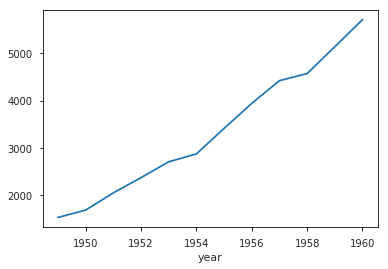

In [52]:
year_group = flights_df.groupby('year')['passengers'].sum()
year_group.plot()
# 乘客数量呈逐年递增的趋势

- 分析乘客在一年中各月份的分布（柱状图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


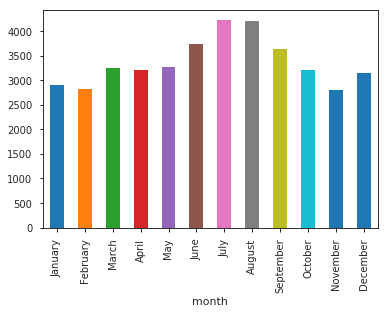

In [58]:
month_group = flights_df.groupby('month',sort=False)['passengers'].sum()
month_group.plot(kind = 'bar')
# 每年的七八月份的乘客数量达到峰值，而冬季月份乘客数目相对较少

### 2.鸢尾花花型尺寸分析

- 载入iris数据集

In [59]:
iris_df=sns.load_dataset("../data/iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- 萼片（sepal）和花瓣（petal）的大小关系（散点图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


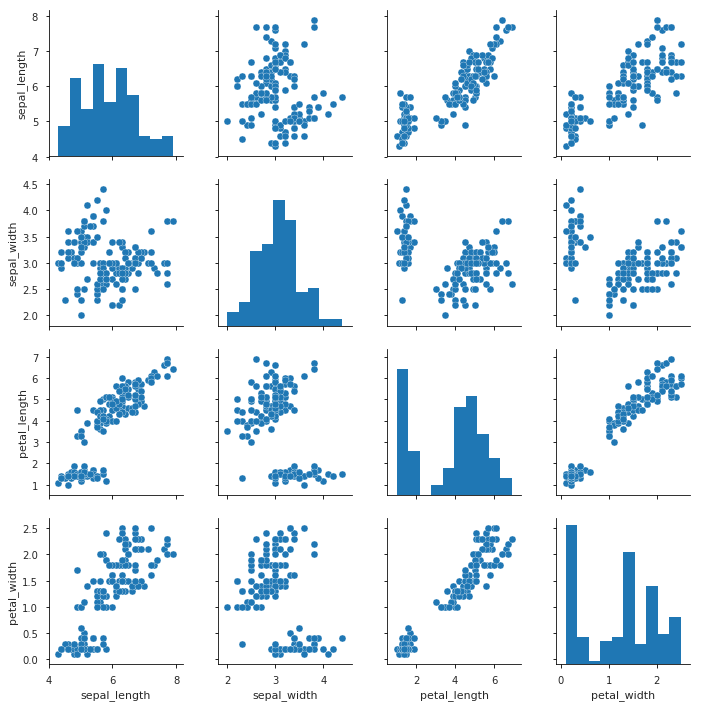

In [61]:
sns.pairplot(data = iris_df)
# petal的长宽之间有很明显的正相关性， 而 sepal的长和宽几乎没有相关性
# petal的长度 和 sepal 的长度 之间相关性较强，而与 sepal 的宽度 没有太大相关性
# petal的宽度 和 sepal 的长度 之江的相关性（正）较强，而与sepal的宽度相关性不大

- 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

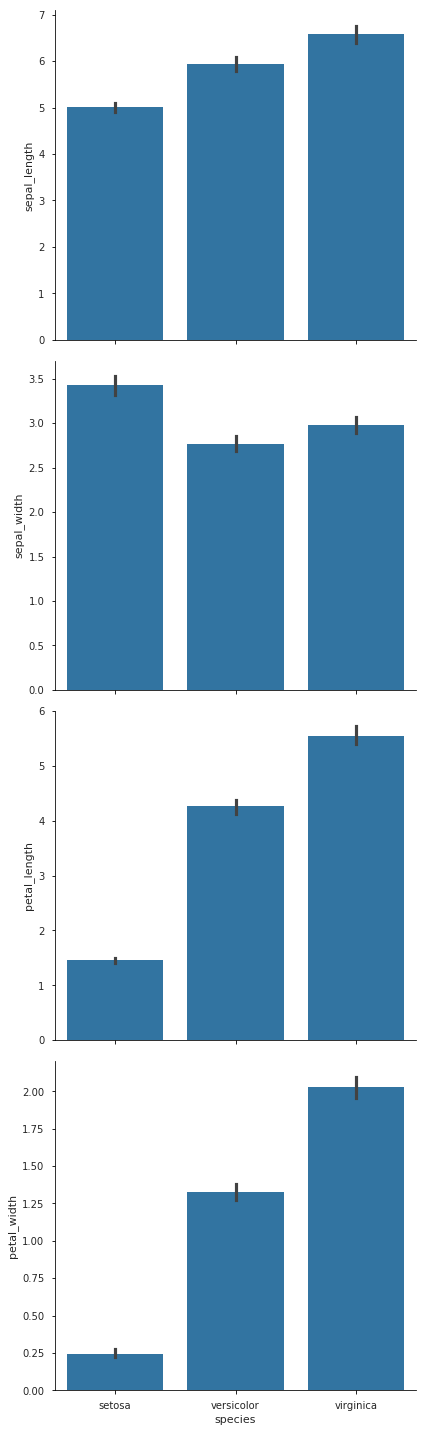

In [105]:
#第一种方法
g = sns.PairGrid(iris_df,
                 x_vars=["species"],
                 y_vars=["sepal_length", "sepal_width","petal_length", "petal_width"], size = 5, aspect = 1.2)
g.map(sns.barplot);
#sns.boxplot()  这里如果换成 boxplot 就会报错，老师如果看到的话 请帮忙看下为什么

# sepal_length: setosa < versicolor < virginica
# sepal_width:  setosa >  virginica > versicolor 特征与其他三类趋势不一致，可以作为一个明显的区分特征
# petal_length: setosa < versicolor < virginica
# petal_width:  setosa < versicolor < virginica

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


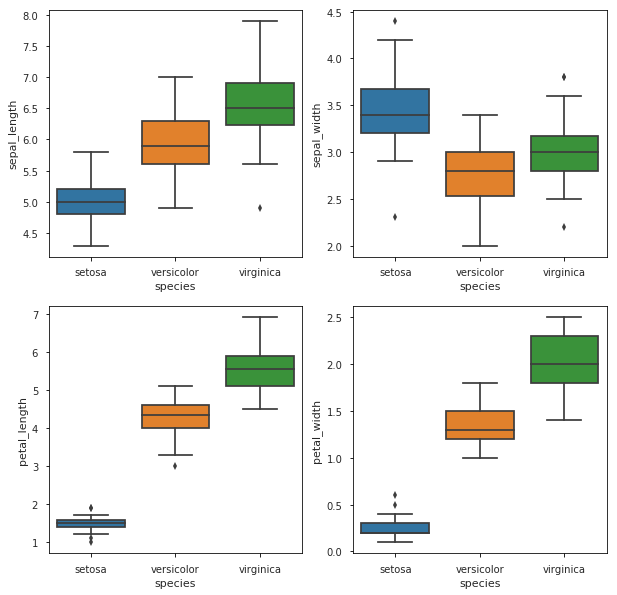

In [64]:
#第二种方法
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x='species',y='sepal_length', data=iris_df,ax = ax[0,0])
sns.boxplot(x='species',y='sepal_width', data=iris_df,ax = ax[0,1])
sns.boxplot(x='species',y='petal_length', data=iris_df,ax = ax[1,0])
sns.boxplot(x='species',y='petal_width', data=iris_df,ax = ax[1,1])

# sepal_length: setosa < versicolor < virginica
# sepal_width:  setosa >  virginica > versicolor 特征与其他三类趋势不一致，可以作为一个明显的区分特征
# petal_length: setosa < versicolor < virginica
# petal_width:  setosa < versicolor < virginica

- 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


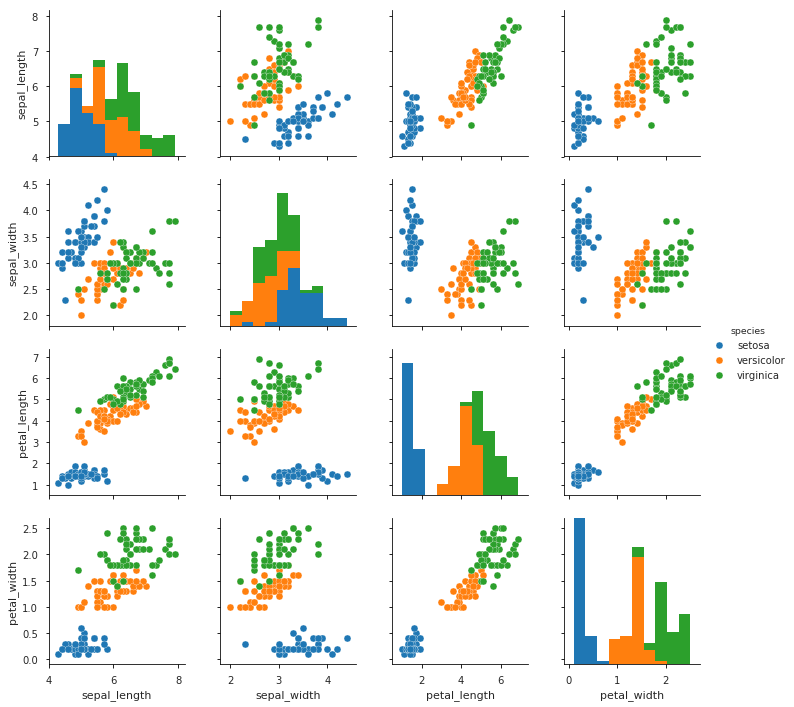

In [65]:
sns.pairplot(data = iris_df, hue = 'species')

# 整体上来说
# sepal_length: setosa < versicolor < virginica
# sepal_width:  setosa >  virginica > versicolor 特征与其他三类趋势不一致，可以作为一个明显的区分特征
# petal_length: setosa < versicolor < virginica
# petal_width:  setosa < versicolor < virginica
# 一个特别需要留意的 特征是  sepal_width

### 3.餐厅小费情况分析
* 载入tips数据集

In [66]:
tips_df=sns.load_dataset("../data/tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 小费和总消费之间的关系（散点图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


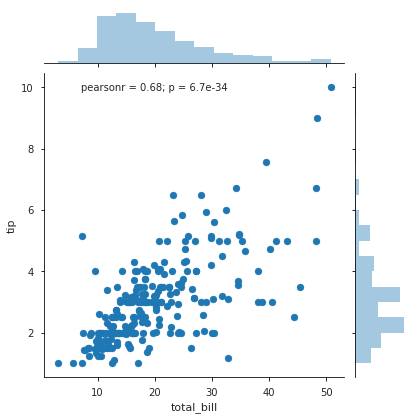

In [68]:
sns.jointplot(x="total_bill", y="tip", data=tips_df, kind='scatter')
#整体上来说，总消费越高，小费就越高
#总消费和小费分布都不是正态分布，集中于金额偏中下的位置

- 男性顾客和女性顾客，谁更慷慨（分类箱式图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


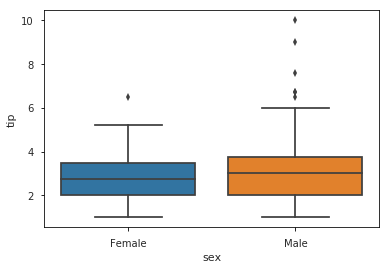

In [69]:
sns.boxplot(x = 'sex', y = 'tip', data = tips_df)
#男性更加慷慨，中位数，25%，75% 都高于女性。

- 抽烟与否是否会对小费金额产生影响（分类箱式图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


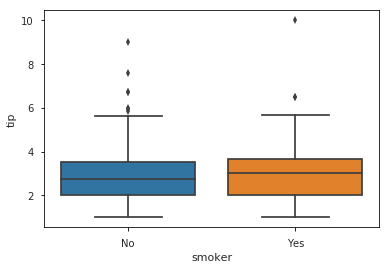

In [70]:
sns.boxplot(x='smoker', y= 'tip',data = tips_df)
#几乎没有影响

- 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


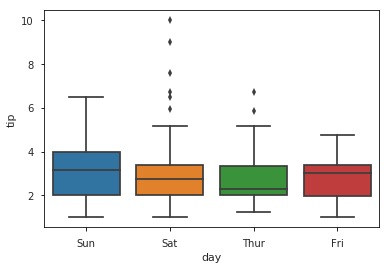

In [71]:
sns.boxplot(x='day',y='tip',data = tips_df)
#周日小费明显更高，而周六并没有比工作日高。

- 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


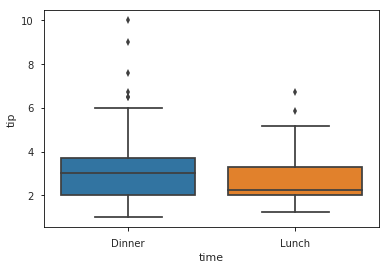

In [72]:
sns.boxplot(x='time',y='tip',data = tips_df)
#Dinner 更愿意给小费，因为比较正式

- 就餐人数是否会对慷慨度产生影响（分类箱式图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


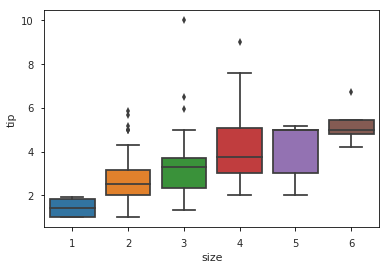

In [73]:
sns.boxplot(x='size',y='tip',data=tips_df)
#很明显 就餐人数越多，小费越高，因为提供的服务越多

- 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


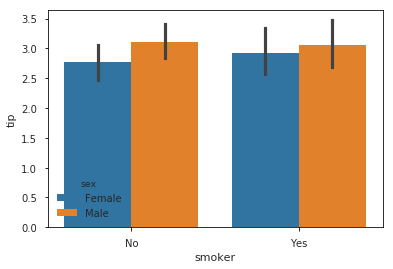

In [74]:
sns.barplot(x = 'smoker', y ='tip', hue ='sex', data = tips_df)
#入上分析，抽烟机会对小费大小没影响，性别对小费影响较大

### 4.泰坦尼克号海难幸存状况分析

* 载入数据集

In [75]:
titanic_df=sns.load_dataset("../data/titanic")
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


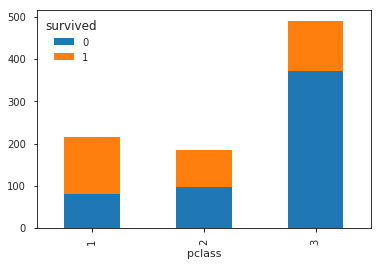

In [77]:
pclass_df = titanic_df[['pclass','survived']].groupby('pclass')['survived'].value_counts()
pclass_df = pclass_df.unstack()
pclass_df.plot(kind = 'bar', stacked=True)
# 由图中可以明显看出仓位等级越高（数值越小），生存率越高

* 不同性别的幸存比例（堆积柱状图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


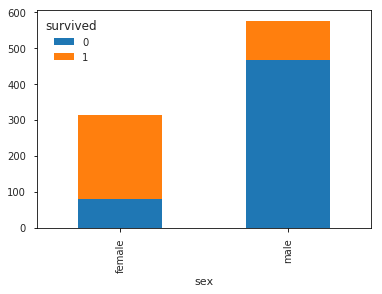

In [78]:
sex_df = titanic_df[['sex', 'survived']].groupby('sex')['survived'].value_counts()
sex_df = sex_df.unstack()
sex_df.plot(kind='bar', stacked = True)
# 女性 幸存比例远高于 男性

* 幸存和遇难乘客的票价分布（分类箱式图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


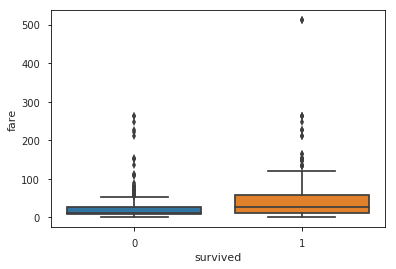

In [79]:
sns.boxplot(x = 'survived', y ='fare', data= titanic_df)
# 幸存者 的票价大多 高于 遇难者， 与之前的仓位等级  相对应

* 幸存和遇难乘客的年龄分布（分类箱式图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


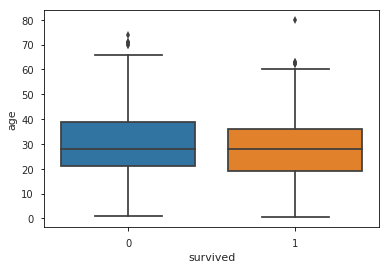

In [80]:
sns.boxplot(x = 'survived', y ='age', data= titanic_df)
#幸存者的年龄分布 比 遇难者 低一些

* 不同上船港口的乘客仓位等级分布（分组柱状图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


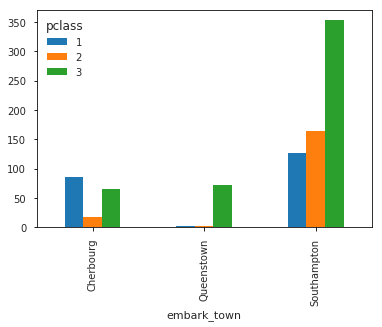

In [81]:
embark_df = titanic_df.groupby('embark_town')['pclass'].value_counts()
embark_df = embark_df.unstack()
embark_df.plot(kind = 'bar', stacked = False)
# Cherbourg 上船的一等 三等乘客 远高于二等舱，说明有可能该地区贫富差异较大
# Queenstown 上船的几乎都是 三等舱， 说明该地区人民比较穷
# Southsmpton 地区上船的人数，3>2>1，比较符合一般规律，而且该港口人数最多，说明城市比较大

* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


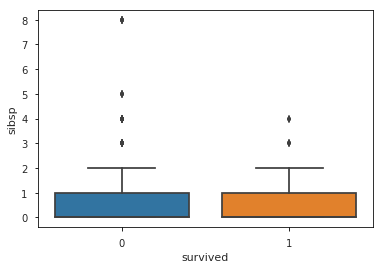

In [82]:
sns.boxplot(x = 'survived', y ='sibsp', data = titanic_df)
# 幸存者与遇难者 兄弟姐妹 数量分布几乎没有差异

* 幸存和遇难乘客父母子女的数量分布（分类箱式图）

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['PingFang.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


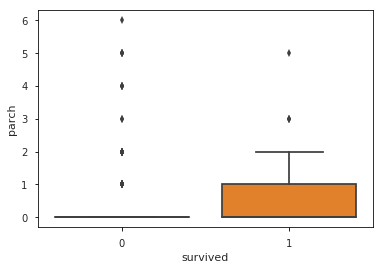

In [83]:
sns.boxplot(x = 'survived', y= 'parch', data = titanic_df)
#幸存者 中 父母子女数量 分布 明显高于 遇难者，说明 有人帮扶一下，还有有用滴

* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

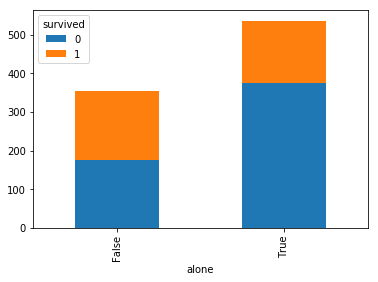

In [84]:
alone_df = titanic_df[['survived', 'alone']].groupby('alone')['survived'].value_counts()
alone_df=alone_df.unstack()
alone_df.plot(kind='bar', stacked = True)
#可以看出单独的乘客整体上比例比较大，但幸存的概率比较低

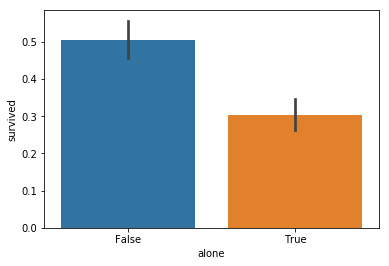

In [85]:
sns.barplot(x = 'alone', y = 'survived', data = titanic_df)
#Y轴可以表征幸存的概率，可以看出不是单独出行的乘客的生存概率较大

***
<center><h1>####答卷结束####</h1></center>

### 本周课程意见反馈(非必答)
请同学围绕以下两点进行回答：
- 自身总结：您自己在本周课程的学习，收获，技能掌握等方面进行总结，包括自身在哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。
- 课程反馈：也可以就知识点，进度，难易度，教学方式，考试方式等等进行意见反馈，督促我们进行更有效的改进，为大家提供更优质的服务。
